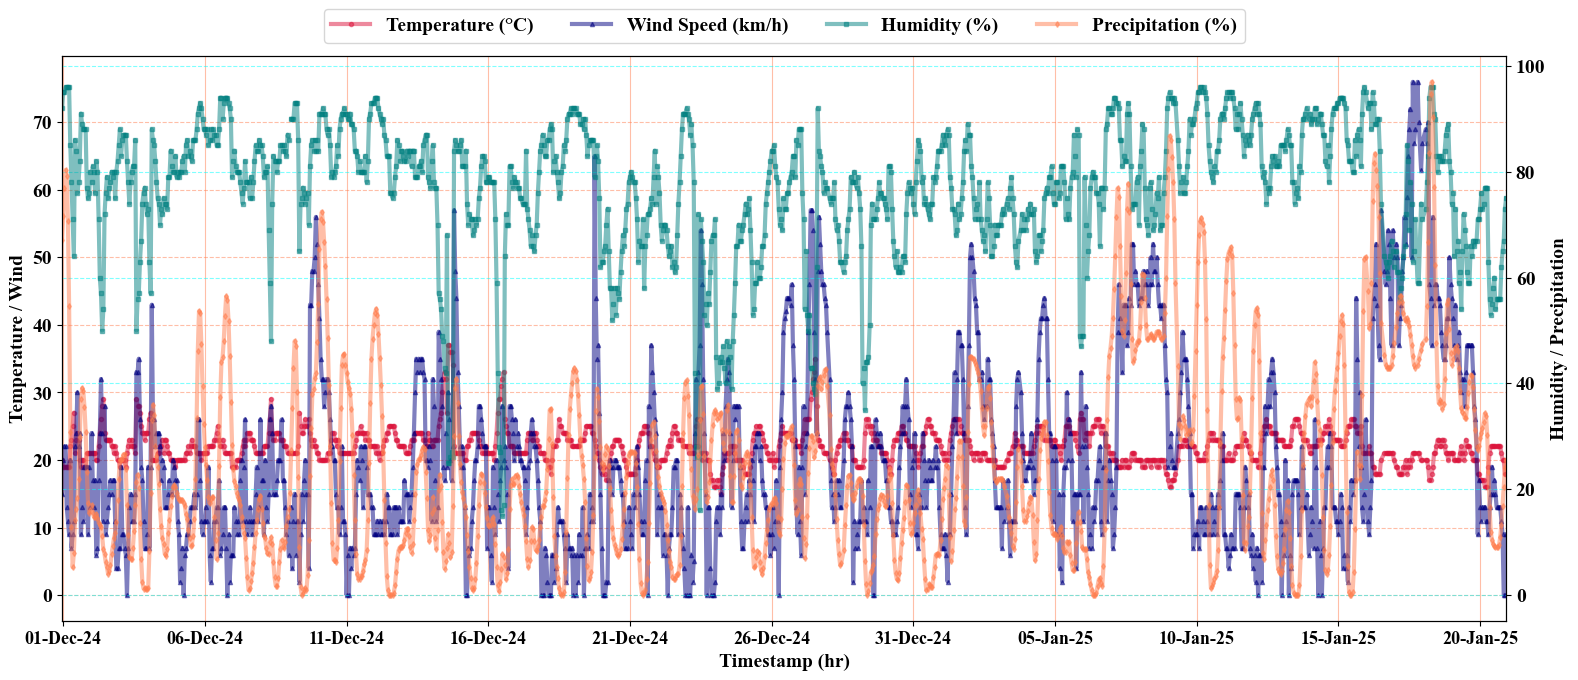

               Timestamp  Temperature_C  Wind_km_h  Humidity_%  \
0    2024-12-01 00:00:00           20.0       15.0        92.0   
1    2024-12-01 01:00:00           19.0       20.0        95.0   
2    2024-12-01 02:00:00           19.0       22.0        95.0   
3    2024-12-01 03:00:00           19.0       22.0        96.0   
4    2024-12-01 04:00:00           19.0       13.0        96.0   
...                  ...            ...        ...         ...   
1205 2025-01-20 19:00:00           21.0       11.0        62.0   
1206 2025-01-20 20:00:00           20.0        9.0        65.0   
1207 2025-01-20 21:00:00           20.0        0.0        67.0   
1208 2025-01-20 22:00:00           18.0        0.0        73.0   
1209 2025-01-20 23:00:00           18.0        9.0        75.0   

      Precipitation_%  
0               67.09  
1               71.61  
2               77.00  
3               80.34  
4               79.11  
...               ...  
1205            13.33  
1206           

,Timestamp,Temperature_C,Wind_km_h,Humidity_%,Precipitation_%
count,1210,1209.000000,1209.000000,1209.000000,1210.000000
mean,2024-12-26 07:00:35.702479360,22.011580,20.103391,76.727874,24.442504
min,2024-12-01 00:00:00,15.000000,0.000000,15.000000,0.000000
25%,2024-12-13 14:15:00,20.000000,11.000000,71.000000,10.247500
50%,2024-12-26 04:30:00,22.000000,17.000000,79.000000,20.000000
75%,2025-01-07 22:45:00,23.000000,26.000000,86.000000,35.220000
max,2025-01-20 23:00:00,37.000000,76.000000,96.000000,97.000000
std,NaN,2.539072,13.720123,12.744869,18.265622


In [1]:
# -----------------------------------------------------------------------------
# Step 1: Load raw weather data
# -----------------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set font globally
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
plt.rcParams["font.weight"] = "bold"

# Load the processed dataset with parsed timestamps
file_path = "Data/Exp/ProcessedData_Meteorological_Wollongong_01Dec24_to_20Jan25.csv"
df = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Create the plot
fig, ax1 = plt.subplots(figsize=(16, 7))

# Plot temperature, wind speed
ax1.plot(
    df['Timestamp'],
    df['Temperature_C'],
    label='Temperature (°C)',
    color='crimson',
    linewidth=3,
    marker='o',
    markersize=3,
    alpha=0.5
)
ax1.plot(
    df['Timestamp'],
    df['Wind_km_h'],
    label='Wind Speed (km/h)',
    color='navy',
    linewidth=3,
    marker='^',
    markersize=3,
    alpha=0.5
)

# Plot humidity and precipitation on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(
    df['Timestamp'],
    df['Humidity_%'],
    label='Humidity (%)',
    color='teal',
    linewidth=3,
    marker='s',
    markersize=3,
    alpha=0.5
)
ax2.plot(
    df['Timestamp'],
    df['Precipitation_%'],
    label='Precipitation (%)',
    color='coral',
    linewidth=3,
    marker='d',
    markersize=3,
    alpha=0.5
)

# Axis labels
ax1.set_xlabel('Timestamp (hr)', fontweight='bold')
ax1.set_ylabel('Temperature / Wind', fontweight='bold')
ax2.set_ylabel('Humidity / Precipitation', fontweight='bold')

# 1. Major ticks at 12:00 each day (so "10 Jan 2025" appears at midday)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=24*5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))

# 2. Minor ticks = every 6 hours
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=24*10))

# 3. Vertical grid lines at every 6h (minor ticks)
ax1.grid(which='minor', linestyle='--', color='coral', alpha=0.5)

# 3a. Horizontal grid lines at each y‐major tick
ax1.grid(which='major', axis='y', linestyle='--', color='coral', alpha=0.5)

ax2.grid(which='major', axis='y', linestyle='--', color='cyan', alpha=0.5)

# 4. Ensure no grid at x‐major ticks
ax1.grid(which='major', axis='x', color='coral', alpha=0.5, visible=True)

# 5. Fix x‐axis range: 
start = pd.Timestamp("2024-12-01 00:00")
end   = pd.Timestamp("2025-01-20 23:00")
ax1.set_xlim(start, end)

# 6. Keep x‐axis labels horizontal & set font size
ax1.tick_params(axis='x', rotation=0, labelsize=13)

# # Remove or comment out this line so labels stay horizontal:
# fig.autofmt_xdate()

# # Shade 15–19 Jan as severe weather
# ax1.axvspan(
#     pd.Timestamp("2025-01-15 14:20"),
#     pd.Timestamp("2025-01-18 22:59"),
#     color='salmon',
#     alpha=0.3,
#     label='Severe Weather Period'
# )

# Merge legends from both axes + shaded patch
lines, labels   = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines + lines2,
    labels + labels2,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=4,
    frameon=True
)

plt.tight_layout()
# plt.savefig(
#     "Figures/Wollongong_Weather_10_20_Jan_2025.png",
#     dpi=600,
#     bbox_inches='tight'
# )
plt.show()


print(df)
df.describe()

In [2]:
### Check whether any 'NaN' or '0' value exists
get_Null = df.isnull().sum()

if get_Null.sum(axis=0).any():   # cleaner check for any nulls
    # Use forward fill instead of interpolate with method='ffill'
    df.ffill(inplace=True)
    print("NaN values found!!")  
    print(get_Null)
    print("====Fixing====")
    print(df.isnull().sum())
    print("NaN values are gone!!")
else:
    print("Did not find any Null/NaN values")

NaN values found!!
Timestamp          0
Temperature_C      1
Wind_km_h          1
Humidity_%         1
Precipitation_%    0
dtype: int64
====Fixing====
Timestamp          0
Temperature_C      0
Wind_km_h          0
Humidity_%         0
Precipitation_%    0
dtype: int64
NaN values are gone!!


In [3]:
# Create a copy of the input DataFrame
df_x = df.copy()
# Convert the 'Timestamp' column to a datetime data type
df_x['Timestamp'] = pd.to_datetime(df_x['Timestamp'])
# Set the 'timestamp' column as the index of the DataFrame
df_x.set_index('Timestamp', inplace=True)
# # Resample to 3-hour intervals (mean to smooth hourly data)
# df_x = df_x.resample("3h").mean()

df_x

,Temperature_C,Wind_km_h,Humidity_%,Precipitation_%
Timestamp,,,,
2024-12-01 00:00:00,20.0,15.0,92.0,67.09
2024-12-01 01:00:00,19.0,20.0,95.0,71.61
2024-12-01 02:00:00,19.0,22.0,95.0,77.00
2024-12-01 03:00:00,19.0,22.0,96.0,80.34
2024-12-01 04:00:00,19.0,13.0,96.0,79.11
...,...,...,...,...
2025-01-20 19:00:00,21.0,11.0,62.0,13.33
2025-01-20 20:00:00,20.0,9.0,65.0,16.89
2025-01-20 21:00:00,20.0,0.0,67.0,20.44


In [ ]:
# ============================================================
# Isolation Forest for Meteorological Anomaly Detection
# - Works with df_x (hourly, index=Timestamp, cols: Temperature_C, Wind_km_h, Humidity_%, Precipitation_%)
# - Calibrates decision threshold using two provided event windows (optional but enabled by default)
# ============================================================
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_recall_fscore_support
from datetime import timedelta, timezone
import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# 0) EXPECTED INPUT: df_x
# -----------------------------
# df_x: a pandas DataFrame with DateTimeIndex named 'Timestamp'
# Columns: ["Temperature_C", "Wind_km_h", "Humidity_%", "Precipitation_%"]
# Example: df_x = pd.read_csv("your_data.csv", parse_dates=["Timestamp"], index_col="Timestamp")
assert isinstance(df_x, pd.DataFrame), "df_x must be a pandas DataFrame"
required_cols = ["Temperature_C", "Wind_km_h", "Humidity_%", "Precipitation_%"]
missing = [c for c in required_cols if c not in df_x.columns]
assert not missing, f"df_x is missing columns: {missing}"
assert isinstance(df_x.index, pd.DatetimeIndex), "df_x.index must be a DatetimeIndex"

# Ensure hourly frequency and sorted
df = df_x.sort_index().copy()
df = df[~df.index.duplicated(keep="first")]

# If not exactly hourly, resample to hourly mean (change to 'nearest' if preferred)
if pd.infer_freq(df.index) != 'H':
    df = df.resample('H').mean()

# Localize to Australia/Sydney if naive; keep as-is if already tz-aware
# (This avoids DST ambiguities during Jan.) Adjust if your index is already in AEDT.
try:
    if df.index.tz is None:
        df.index = df.index.tz_localize("Australia/Sydney")
except Exception:
    # If timestamps are actually UTC, you can replace tz_localize with tz_convert as needed.
    pass

# -----------------------------
# 1) Feature engineering
# -----------------------------
def add_time_features(frame: pd.DataFrame) -> pd.DataFrame:
    z = frame.copy()

    # Basic lags and rates of change (captures short-term dynamics)
    for col in required_cols:
        z[f"{col}_diff1"] = z[col].diff(1)
        z[f"{col}_diff3"] = z[col].diff(3)

    # Rolling variability / level
    for w in (3, 6, 12, 24):
        for col in required_cols:
            z[f"{col}_roll{w}_mean"] = z[col].rolling(w, min_periods=max(2, w//2)).mean()
            z[f"{col}_roll{w}_std"]  = z[col].rolling(w, min_periods=max(2, w//2)).std()

    # Calendar cyclicity (hour-of-day, day-of-week, week-of-year)
    idx_local = z.index
    hod = idx_local.hour.values
    dow = idx_local.dayofweek.values
    woy = idx_local.isocalendar().week.astype(int).values

    z["hour_sin"] = np.sin(2*np.pi*hod/24.0)
    z["hour_cos"] = np.cos(2*np.pi*hod/24.0)
    z["dow_sin"]  = np.sin(2*np.pi*dow/7.0)
    z["dow_cos"]  = np.cos(2*np.pi*dow/7.0)
    z["woy_sin"]  = np.sin(2*np.pi*woy/52.0)
    z["woy_cos"]  = np.cos(2*np.pi*woy/52.0)

    # Fill any nas from rolling/diff with forward/back fill then zeros as last resort
    z = z.replace([np.inf, -np.inf], np.nan)
    z = z.fillna(method="ffill").fillna(method="bfill").fillna(0.0)
    return z

Z = add_time_features(df)

# Feature matrix X and a copy of original for output
feature_cols = [c for c in Z.columns if c not in []]  # keep all engineered columns
X = Z[feature_cols].astype(float).copy()

# Robust scaling (handles outliers better than StandardScaler)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 2) Define weak labels (optional calibration)
# -----------------------------
# Known event windows from your notes (AEDT). We use them as "weak ground truth":
# A) Mild bursty spell
win1_start = pd.Timestamp("2025-01-07 14:20", tz="Australia/Sydney")
win1_end   = pd.Timestamp("2025-01-10 22:00", tz="Australia/Sydney")

# B) Heavier event (coastal low)
win2_start = pd.Timestamp("2025-01-16 00:00", tz="Australia/Sydney")
win2_end   = pd.Timestamp("2025-01-18 23:59", tz="Australia/Sydney")

y_weak = pd.Series(0, index=df.index, dtype=int)
y_weak.loc[(y_weak.index >= win1_start) & (y_weak.index <= win1_end)] = 1
y_weak.loc[(y_weak.index >= win2_start) & (y_weak.index <= win2_end)] = 1

# -----------------------------
# 3) Fit Isolation Forest (unsupervised)
# -----------------------------
# Contamination: proportion of hours expected anomalous.
# Dec 1 → Jan 31 ≈ 61 days → ~1464 hours. Your two windows total ≈ 3.5 + 3 days ≈ ~162 hours ~ 11%.
# Use a slightly conservative prior (0.10); we will still calibrate threshold after scoring.
iso = IsolationForest(
    n_estimators=400,
    max_samples="auto",
    contamination=0.10,      # prior; threshold later refined via calibration
    max_features=1.0,
    random_state=42,
    n_jobs=-1,
    bootstrap=False
)
iso.fit(X_scaled)

# Raw anomaly scores: the more negative, the more anomalous
# sklearn returns "score_samples": higher is more normal.
score = iso.score_samples(X_scaled)
df_out = df.copy()
df_out["iso_score"] = score

# -----------------------------
# 4) Threshold selection
# -----------------------------
# Strategy: choose a score threshold that maximizes F1 against y_weak,
# subject to a contamination cap (so we don't label everything anomalous).
# We scan possible thresholds across score quantiles.
def calibrate_threshold(scores: np.ndarray, weak_labels: pd.Series,
                        max_contam=0.20, n_grid=200):
    # Scan thresholds from low (strict) to high (lenient)
    qs = np.linspace(0.01, 0.30, n_grid)  # search range of quantiles (1%..30% anomalies)
    best = {"th": None, "f1": -1, "prec": 0, "rec": 0, "contam": None}
    s = pd.Series(scores, index=weak_labels.index)
    for q in qs:
        th = s.quantile(q)  # threshold on score_samples: scores <= th => anomaly
        pred = (s <= th).astype(int)
        contam = pred.mean()
        if contam > max_contam:
            continue
        pr, rc, f1, _ = precision_recall_fscore_support(weak_labels.values, pred.values, average="binary", zero_division=0)
        if f1 > best["f1"]:
            best = {"th": th, "f1": f1, "prec": pr, "rec": rc, "contam": contam}
    return best

calib = calibrate_threshold(df_out["iso_score"].values, y_weak, max_contam=0.20, n_grid=240)
if calib["th"] is None:
    # fallback to model's implicit contamination (10% quantile)
    calib = {"th": np.quantile(df_out["iso_score"].values, 0.10), "f1": np.nan, "prec": np.nan, "rec": np.nan, "contam": 0.10}

df_out["anomaly_hour"] = (df_out["iso_score"] <= calib["th"]).astype(int)

# -----------------------------
# 5) Post-processing: merge hours into spans
# -----------------------------
def spans_from_flags(flags: pd.Series, min_span_hours=2, max_gap_hours=1):
    """
    Merge contiguous (or near-contiguous) anomaly hours into spans.
    - min_span_hours: require at least this many hours in a span
    - max_gap_hours: allow small gaps inside a span (e.g., 1 hour normal)
    """
    idx = flags.index
    spans = []
    in_span = False
    start = None
    run_count = 0
    gap_count = 0

    for t, v in flags.items():
        if v == 1:
            if not in_span:
                # starting
                in_span = True
                start = t
                run_count = 1
                gap_count = 0
            else:
                # continuing span
                run_count += 1
                gap_count = 0
        else:
            # normal hour
            if in_span:
                gap_count += 1
                if gap_count > max_gap_hours:
                    # close the span before the gap
                    end = t - pd.Timedelta(hours=gap_count)
                    duration_h = int((end - start) / pd.Timedelta(hours=1) + 1e-9)
                    if duration_h >= min_span_hours:
                        spans.append((start, end, duration_h))
                    in_span = False
                    start = None
                    run_count = 0
                    gap_count = 0
            # else remain idle

    # close tail
    if in_span and start is not None:
        end = flags.index[-1]
        # If ended with a small gap, trim the gap off:
        if gap_count > 0:
            end = end - pd.Timedelta(hours=gap_count)
        duration_h = int((end - start) / pd.Timedelta(hours=1) + 1e-9)
        if duration_h >= min_span_hours:
            spans.append((start, end, duration_h))

    return spans

spans = spans_from_flags(df_out["anomaly_hour"], min_span_hours=3, max_gap_hours=1)

# -----------------------------
# 6) Reporting
# -----------------------------
def pretty_span(s, e):
    return f"{s.strftime('%Y-%m-%d %H:%M %Z')}  →  {e.strftime('%Y-%m-%d %H:%M %Z')}"

print("\n=== Isolation Forest Calibration ===")
print(f"Threshold (score_samples ≤ th) : {calib['th']:.4f}")
print(f"Approx contamination (hours)   : {calib['contam']:.3f}")
print(f"Weak-supervision F1/Prec/Rec  : {calib['f1']:.3f} / {calib['prec']:.3f} / {calib['rec']:.3f}")

print("\n=== Detected Anomalous Spans (merged) ===")
if spans:
    for i, (s, e, d) in enumerate(spans, 1):
        print(f"{i:02d}. {pretty_span(s,e)}   | ~{d} h")
else:
    print("No multi-hour spans detected with current parameters.")

# Save hour-level results and spans
out_hourly_csv = "anomaly_hours_isoforest.csv"
df_out.assign(anomaly_score_quantile=(df_out["iso_score"].rank(pct=True))).to_csv(out_hourly_csv, index=True)
print(f"\nSaved hourly anomaly table → {out_hourly_csv}")

# Spans summary dataframe
spans_df = pd.DataFrame(
    [(s, e, d) for (s, e, d) in spans],
    columns=["start", "end", "duration_hours"]
)
spans_csv = "anomaly_spans_isoforest.csv"
spans_df.to_csv(spans_csv, index=False)
print(f"Saved spans summary → {spans_csv}")

# -----------------------------
# 7) (Optional) Quick sanity check vs provided windows
# -----------------------------
def overlap_hours(a_start, a_end, b_start, b_end):
    t0 = max(a_start, b_start)
    t1 = min(a_end, b_end)
    return max(0, int((t1 - t0) / pd.Timedelta(hours=1)))

if len(spans) > 0:
    # compute best overlap for each known window
    for label, (ws, we) in {
        "Mild 7–10 Jan": (win1_start, win1_end),
        "Heavy 16–18 Jan": (win2_start, win2_end),
    }.items():
        best = 0
        best_span = None
        for s, e, d in spans:
            ov = overlap_hours(s, e, ws, we)
            if ov > best:
                best = ov
                best_span = (s, e, d)
        print(f"\nOverlap with {label}: {best} hours  {'| Detected span: ' + pretty_span(best_span[0], best_span[1]) if best_span else ''}")


C:\Users\rbmxu\AppData\Local\Temp\ipykernel_27404\3465572535.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample("H").mean()
C:\Users\rbmxu\AppData\Local\Temp\ipykernel_27404\3465572535.py:84: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Z = Z.replace([np.inf, -np.inf], np.nan).fillna(method="ffill").fillna(method="bfill").fillna(0.0)


=== Isolation Forest vs Ground Truth Windows ===
Threshold (score <= th) : -0.4727
Contamination (pred %)  : 0.199
Accuracy                : 0.809
Precision               : 0.332
Recall                  : 0.533
F1-score                : 0.409
Confusion matrix [[TN, FP],[FN, TP]]:
[[909 163]
 [ 71  81]]


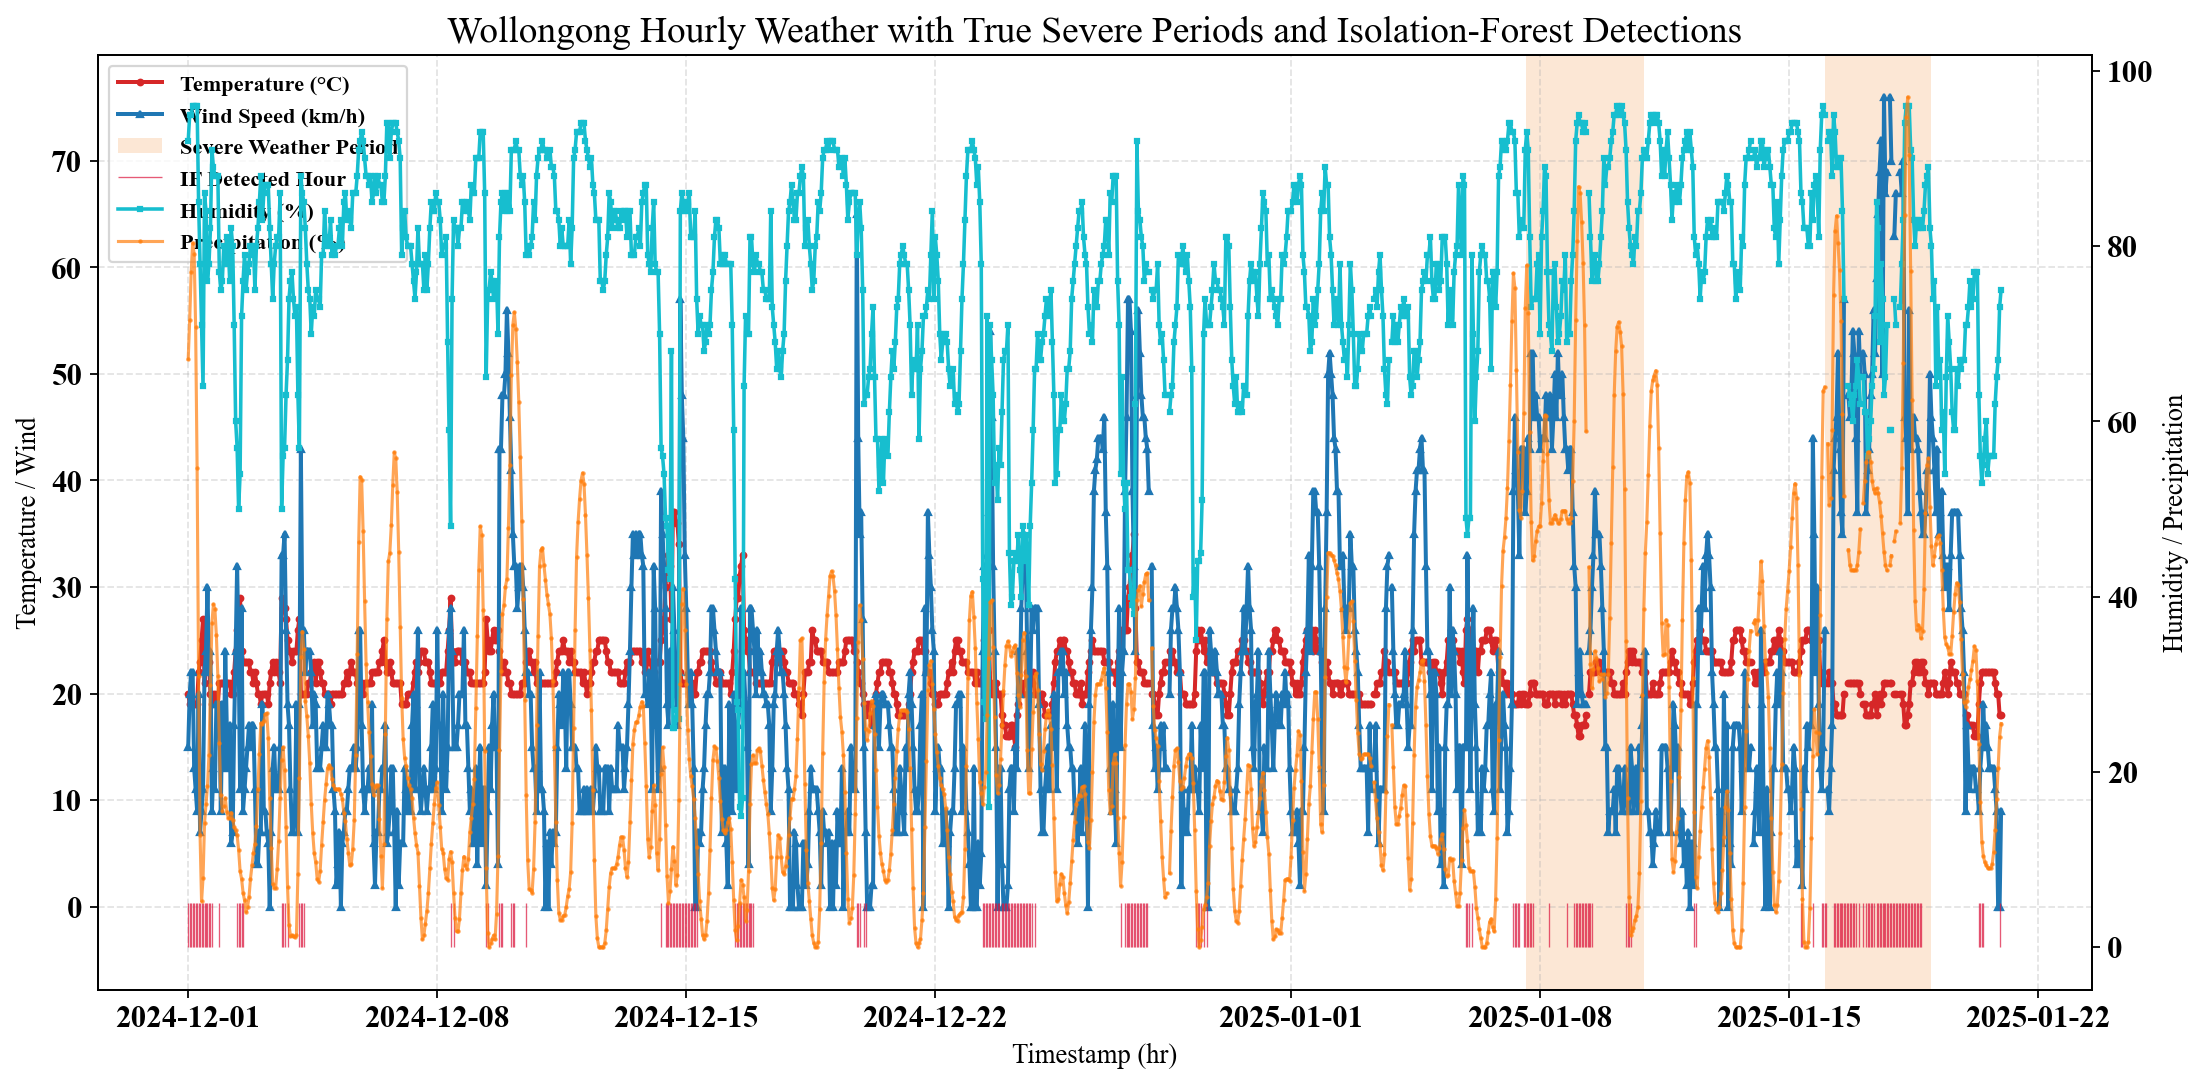

In [4]:
# ============================================
# Isolation Forest + Metrics + Publication Plot
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    confusion_matrix
)

# --------------------------------------------
# 0) INPUT: df_x  (or load from CSV)
# --------------------------------------------
# If needed:
# df_x = pd.read_csv("Data/Exp/ProcessedData_Wollongong_Weather__Dec2024_Jan2025.csv",
#                    parse_dates=["Timestamp"], index_col="Timestamp")

assert isinstance(df_x, pd.DataFrame)
df = df_x.copy().sort_index()
df = df[~df.index.duplicated(keep="first")]

# Ensure hourly cadence
if pd.infer_freq(df.index) != "H":
    df = df.resample("H").mean()

# Localize to Australia/Sydney if naive (keep if already tz-aware)
try:
    if df.index.tz is None:
        df.index = df.index.tz_localize("Australia/Sydney")
except Exception:
    pass

REQ = ["Temperature_C", "Wind_km_h", "Humidity_%", "Precipitation_%"]
for c in REQ:
    if c not in df.columns:
        raise ValueError(f"Missing column: {c}")

# --------------------------------------------
# 1) Ground-truth anomaly windows (AEDT)
# --------------------------------------------
# Mild, bursty:
win1_start = pd.Timestamp("2025-01-07 14:20", tz="Australia/Sydney")
win1_end   = pd.Timestamp("2025-01-10 22:00", tz="Australia/Sydney")

# Heavy coastal low:
win2_start = pd.Timestamp("2025-01-16 00:00", tz="Australia/Sydney")
win2_end   = pd.Timestamp("2025-01-18 23:59", tz="Australia/Sydney")

y_true = pd.Series(0, index=df.index, dtype=int)
y_true[(y_true.index >= win1_start) & (y_true.index <= win1_end)] = 1
y_true[(y_true.index >= win2_start) & (y_true.index <= win2_end)] = 1

# --------------------------------------------
# 2) Feature engineering
# --------------------------------------------
Z = df[REQ].copy()

# Short-term dynamics
for col in REQ:
    Z[f"{col}_diff1"] = Z[col].diff(1)
    Z[f"{col}_diff3"] = Z[col].diff(3)

# Rolling level/volatility
for w in (3, 6, 12, 24):
    for col in REQ:
        Z[f"{col}_roll{w}_mean"] = Z[col].rolling(w, min_periods=max(2, w//2)).mean()
        Z[f"{col}_roll{w}_std"]  = Z[col].rolling(w, min_periods=max(2, w//2)).std()

# Cyclic time features
hod = Z.index.hour.values
dow = Z.index.dayofweek.values
woy = Z.index.isocalendar().week.astype(int).values
Z["hour_sin"] = np.sin(2*np.pi*hod/24.0)
Z["hour_cos"] = np.cos(2*np.pi*hod/24.0)
Z["dow_sin"]  = np.sin(2*np.pi*dow/7.0)
Z["dow_cos"]  = np.cos(2*np.pi*dow/7.0)
Z["woy_sin"]  = np.sin(2*np.pi*woy/52.0)
Z["woy_cos"]  = np.cos(2*np.pi*woy/52.0)

Z = Z.replace([np.inf, -np.inf], np.nan).fillna(method="ffill").fillna(method="bfill").fillna(0.0)

# Scale
scaler = RobustScaler()
X = scaler.fit_transform(Z.values)

# --------------------------------------------
# 3) Isolation Forest + threshold calibration
# --------------------------------------------
iso = IsolationForest(
    n_estimators=400,
    contamination=0.10,     # prior; actual threshold set below
    random_state=42,
    n_jobs=-1
).fit(X)

# Higher score => more normal; anomalies are low scores
scores = pd.Series(iso.score_samples(X), index=df.index, name="iso_score")

# Calibrate threshold to maximize F1 vs y_true with a contamination cap
def choose_threshold(scores_s, y_true_s, max_contam=0.20, grid=240):
    qs = np.linspace(0.01, 0.30, grid)  # scan 1%..30% anomaly rate
    best = {"th": None, "f1": -1, "p": 0, "r": 0, "contam": None}
    for q in qs:
        th = scores_s.quantile(q)
        y_pred = (scores_s <= th).astype(int)
        contam = y_pred.mean()
        if contam > max_contam:
            continue
        p, r, f1, _ = precision_recall_fscore_support(
            y_true_s, y_pred, average="binary", zero_division=0
        )
        if f1 > best["f1"]:
            best = {"th": th, "f1": f1, "p": p, "r": r, "contam": contam}
    if best["th"] is None:  # fallback: 10% quantile
        best["th"] = scores_s.quantile(0.10)
        y_pred = (scores_s <= best["th"]).astype(int)
        best["contam"] = y_pred.mean()
        p, r, f1, _ = precision_recall_fscore_support(
            y_true_s, y_pred, average="binary", zero_division=0
        )
        best.update({"p": p, "r": r, "f1": f1})
    return best

cal = choose_threshold(scores, y_true, max_contam=0.20, grid=240)
y_pred = (scores <= cal["th"]).astype(int)

# --------------------------------------------
# 4) Metrics
# --------------------------------------------
acc = accuracy_score(y_true, y_pred)
p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
cm = confusion_matrix(y_true, y_pred, labels=[0,1])  # [[TN, FP],[FN, TP]]

print("=== Isolation Forest vs Ground Truth Windows ===")
print(f"Threshold (score <= th) : {cal['th']:.4f}")
print(f"Contamination (pred %)  : {cal['contam']:.3f}")
print(f"Accuracy                : {acc:.3f}")
print(f"Precision               : {p:.3f}")
print(f"Recall                  : {r:.3f}")
print(f"F1-score                : {f1:.3f}")
print("Confusion matrix [[TN, FP],[FN, TP]]:")
print(cm)

# --------------------------------------------
# 5) Plot (replicates your style)
# --------------------------------------------
plt.figure(figsize=(14, 7), dpi=160)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Base series
ax1.plot(df.index, df["Temperature_C"], marker="o", markersize=2.5, linewidth=1.8,
         label="Temperature (°C)", color="#d62728")     # red
ax1.plot(df.index, df["Wind_km_h"], marker="^", markersize=2.5, linewidth=1.8,
         label="Wind Speed (km/h)", color="#1f77b4")    # blue

ax2.plot(df.index, df["Humidity_%"], marker="s", markersize=2.0, linewidth=1.6,
         label="Humidity (%)", color="#17becf")         # teal
ax2.plot(df.index, df["Precipitation_%"], marker=".", markersize=2.0, linewidth=1.4,
         label="Precipitation (%)", color="#ff7f0e", alpha=0.7)  # orange

# Shade TRUE anomaly windows
def shade(ax, s, e, label=None, color="#f4a259"):
    ax.axvspan(s, e, color=color, alpha=0.25, lw=0, label=label)

shade(ax1, win1_start, win1_end, label="Severe Weather Period")
shade(ax1, win2_start, win2_end)  # same label to keep legend compact

# Mark IF anomalies as vertical tick marks on bottom axis (subtle)
anom_times = df.index[y_pred.values == 1]
ylim1 = ax1.get_ylim()
ax1.vlines(anom_times, ymin=ylim1[0], ymax=ylim1[0] + 0.05*(ylim1[1]-ylim1[0]),
           color="crimson", alpha=0.7, linewidth=0.6, label="IF Detected Hour")

# Grid / styling
ax1.grid(True, which="both", linestyle="--", alpha=0.35)
ax1.set_xlabel("Timestamp (hr)", fontsize=12)
ax1.set_ylabel("Temperature / Wind", fontsize=12)
ax2.set_ylabel("Humidity / Precipitation", fontsize=12)

# Build a single legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Remove duplicate "IF Detected Hour" in case of repeated handles
comb_lines, comb_labels = [], []
seen = set()
for h, l in list(zip(lines1+lines2, labels1+labels2)):
    if l not in seen:
        comb_lines.append(h); comb_labels.append(l); seen.add(l)

leg = ax1.legend(comb_lines, comb_labels, loc="upper left", frameon=True,
                 fontsize=10)

plt.title("Wollongong Hourly Weather with True Severe Periods and Isolation-Forest Detections")
plt.tight_layout()
plt.show()


C:\Users\rbmxu\AppData\Local\Temp\ipykernel_27404\3866388114.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample("H").mean()
C:\Users\rbmxu\AppData\Local\Temp\ipykernel_27404\3866388114.py:127: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Z = Z.replace([np.inf, -np.inf], np.nan).fillna(method="ffill").fillna(method="bfill").fillna(0.0)


=== DEC+JAN Severe-Weather Evaluation ===
Threshold (score <= th) : -0.4727
Contamination (pred %)  : 0.199
Accuracy                : 0.806
Precision               : 0.463
Recall                  : 0.514
F1-score                : 0.487
Confusion matrix [[TN, FP],[FN, TP]]:
[[873 131]
 [107 113]]


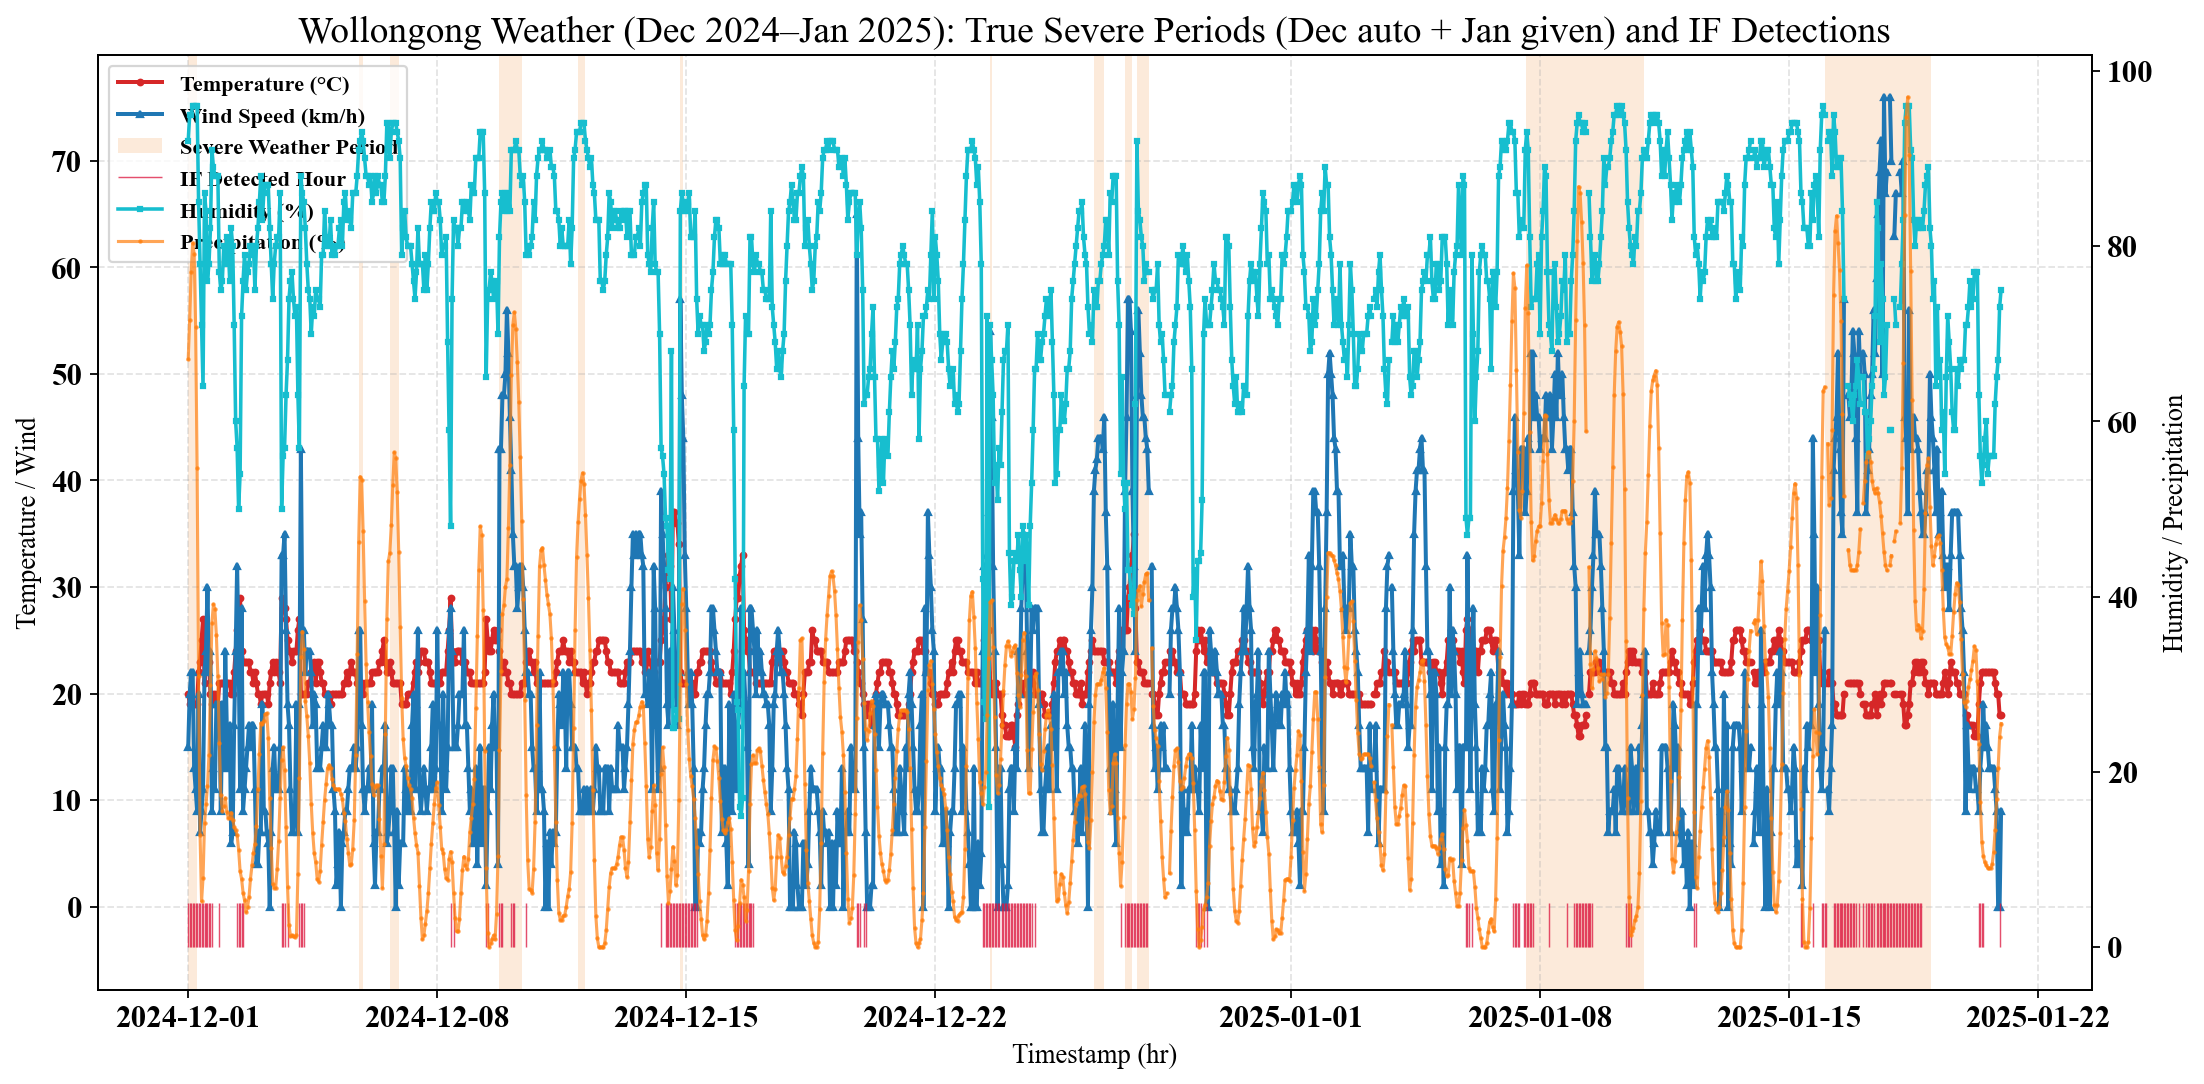

In [5]:
# ============================================================
# Add DEC-2024 severe-period detection + unified evaluation
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# ---------- INPUT ----------
# df must be your hourly DataFrame with index=Timestamp (naive or tz-aware)
# columns: ["Temperature_C","Wind_km_h","Humidity_%","Precipitation_%"]
df = df_x.copy().sort_index()
df = df[~df.index.duplicated(keep="first")]
if pd.infer_freq(df.index) != "H":
    df = df.resample("H").mean()

try:
    if df.index.tz is None:
        df.index = df.index.tz_localize("Australia/Sydney")
except Exception:
    pass

REQ = ["Temperature_C","Wind_km_h","Humidity_%","Precipitation_%"]
for c in REQ:
    if c not in df.columns:
        raise ValueError(f"Missing column: {c}")

# ---------- (A) Automatic severe detection for DEC-2024 ----------
DEC_START = pd.Timestamp("2024-12-01 00:00", tz="Australia/Sydney")
DEC_END   = pd.Timestamp("2024-12-31 23:59", tz="Australia/Sydney")
dec = df.loc[(df.index >= DEC_START) & (df.index <= DEC_END), REQ].copy()

# Heuristics (tune if needed):
# - Precipitation_% ≥ P95_DEC for ≥ 3 consecutive hours  OR
# - Wind_km_h ≥ W95_DEC for ≥ 3 consecutive hours  OR
# - Joint condition: (Precip ≥ P90_DEC AND Wind ≥ W90_DEC) for ≥ 2 consecutive hours
# These thresholds adapt to December’s distribution (robust to scaling/unit).
P90_DEC = np.nanpercentile(dec["Precipitation_%"], 90)
P95_DEC = np.nanpercentile(dec["Precipitation_%"], 95)
W90_DEC = np.nanpercentile(dec["Wind_km_h"], 90)
W95_DEC = np.nanpercentile(dec["Wind_km_h"], 95)

cond1 = (dec["Precipitation_%"] >= P95_DEC)
cond2 = (dec["Wind_km_h"] >= W95_DEC)
cond3 = (dec["Precipitation_%"] >= P90_DEC) & (dec["Wind_km_h"] >= W90_DEC)

# Helper to merge consecutive hours satisfying a boolean mask
def spans_from_mask(mask: pd.Series, min_run: int) -> list[tuple[pd.Timestamp,pd.Timestamp,int]]:
    spans = []
    run_start = None
    run_len = 0
    for t, v in mask.items():
        if v:
            if run_start is None:
                run_start = t
                run_len = 1
            else:
                run_len += 1
        else:
            if run_start is not None:
                if run_len >= min_run:
                    end = t - pd.Timedelta(hours=1)
                    spans.append((run_start, end, run_len))
                run_start = None
                run_len = 0
    if run_start is not None and run_len >= min_run:
        end = mask.index[-1]
        spans.append((run_start, end, run_len))
    return spans

sp1 = spans_from_mask(cond1, min_run=3)
sp2 = spans_from_mask(cond2, min_run=3)
sp3 = spans_from_mask(cond3, min_run=2)

# Union the December spans (allow small gaps of 1 hour)
def merge_spans(spans, max_gap_hours=1):
    if not spans:
        return []
    spans = sorted(spans, key=lambda x: x[0])
    merged = [spans[0]]
    for s, e, d in spans[1:]:
        last_s, last_e, last_d = merged[-1]
        if (s - last_e) <= pd.Timedelta(hours=max_gap_hours+1):  # ≤1h gap
            new_e = max(last_e, e)
            merged[-1] = (last_s, new_e, int((new_e - last_s)/pd.Timedelta(hours=1))+1)
        else:
            merged.append((s, e, d))
    return merged

dec_spans = merge_spans(sp1 + sp2 + sp3, max_gap_hours=1)

# ---------- (B) Your JAN-2025 ground-truth severe windows ----------
JAN_WIN1 = (pd.Timestamp("2025-01-07 14:20", tz="Australia/Sydney"),
            pd.Timestamp("2025-01-10 22:00", tz="Australia/Sydney"))
JAN_WIN2 = (pd.Timestamp("2025-01-16 00:00", tz="Australia/Sydney"),
            pd.Timestamp("2025-01-18 23:59", tz="Australia/Sydney"))

# ---------- (C) Build unified ground-truth label y_true (Dec + Jan) ----------
y_true = pd.Series(0, index=df.index, dtype=int)

# Label December severe spans (auto)
for s, e, _ in dec_spans:
    y_true.loc[(y_true.index >= s) & (y_true.index <= e)] = 1

# Label January windows (given)
y_true.loc[(y_true.index >= JAN_WIN1[0]) & (y_true.index <= JAN_WIN1[1])] = 1
y_true.loc[(y_true.index >= JAN_WIN2[0]) & (y_true.index <= JAN_WIN2[1])] = 1

# ---------- (D) Feature engineering for Isolation Forest ----------
Z = df[REQ].copy()
for col in REQ:
    Z[f"{col}_diff1"] = Z[col].diff(1)
    Z[f"{col}_diff3"] = Z[col].diff(3)
for w in (3, 6, 12, 24):
    for col in REQ:
        Z[f"{col}_roll{w}_mean"] = Z[col].rolling(w, min_periods=max(2, w//2)).mean()
        Z[f"{col}_roll{w}_std"]  = Z[col].rolling(w, min_periods=max(2, w//2)).std()

hod = Z.index.hour.values
dow = Z.index.dayofweek.values
woy = Z.index.isocalendar().week.astype(int).values
Z["hour_sin"] = np.sin(2*np.pi*hod/24.0); Z["hour_cos"] = np.cos(2*np.pi*hod/24.0)
Z["dow_sin"]  = np.sin(2*np.pi*dow/7.0);  Z["dow_cos"]  = np.cos(2*np.pi*dow/7.0)
Z["woy_sin"]  = np.sin(2*np.pi*woy/52.0); Z["woy_cos"]  = np.cos(2*np.pi*woy/52.0)
Z = Z.replace([np.inf, -np.inf], np.nan).fillna(method="ffill").fillna(method="bfill").fillna(0.0)

scaler = RobustScaler()
X = scaler.fit_transform(Z.values)

# ---------- (E) Isolation Forest + calibrated threshold ----------
iso = IsolationForest(n_estimators=400, contamination=0.10, random_state=42, n_jobs=-1).fit(X)
scores = pd.Series(iso.score_samples(X), index=df.index, name="iso_score")

def choose_threshold(scores_s, y_true_s, max_contam=0.20, grid=240):
    qs = np.linspace(0.01, 0.30, grid)
    best = {"th": None, "f1": -1, "p": 0, "r": 0, "contam": None}
    for q in qs:
        th = scores_s.quantile(q)
        y_pred = (scores_s <= th).astype(int)
        contam = y_pred.mean()
        if contam > max_contam:
            continue
        p, r, f1, _ = precision_recall_fscore_support(y_true_s, y_pred, average="binary", zero_division=0)
        if f1 > best["f1"]:
            best = {"th": th, "f1": f1, "p": p, "r": r, "contam": contam}
    if best["th"] is None:
        best["th"] = scores_s.quantile(0.10)
        y_pred = (scores_s <= best["th"]).astype(int)
        best["contam"] = y_pred.mean()
        p, r, f1, _ = precision_recall_fscore_support(y_true_s, y_pred, average="binary", zero_division=0)
        best.update({"p": p, "r": r, "f1": f1})
    return best

cal = choose_threshold(scores, y_true, max_contam=0.20, grid=240)
y_pred = (scores <= cal["th"]).astype(int)

# ---------- (F) Metrics ----------
acc = accuracy_score(y_true, y_pred)
p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
cm = confusion_matrix(y_true, y_pred, labels=[0,1])

print("=== DEC+JAN Severe-Weather Evaluation ===")
print(f"Threshold (score <= th) : {cal['th']:.4f}")
print(f"Contamination (pred %)  : {cal['contam']:.3f}")
print(f"Accuracy                : {acc:.3f}")
print(f"Precision               : {p:.3f}")
print(f"Recall                  : {r:.3f}")
print(f"F1-score                : {f1:.3f}")
print("Confusion matrix [[TN, FP],[FN, TP]]:")
print(cm)

# ---------- (G) Plot (Dec+Jan) ----------
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=160)
ax2 = ax1.twinx()

ax1.plot(df.index, df["Temperature_C"], marker="o", markersize=2.5, linewidth=1.8,
         label="Temperature (°C)", color="#d62728")
ax1.plot(df.index, df["Wind_km_h"], marker="^", markersize=2.5, linewidth=1.8,
         label="Wind Speed (km/h)", color="#1f77b4")

ax2.plot(df.index, df["Humidity_%"], marker="s", markersize=2.0, linewidth=1.6,
         label="Humidity (%)", color="#17becf")
ax2.plot(df.index, df["Precipitation_%"], marker=".", markersize=2.0, linewidth=1.4,
         label="Precipitation (%)", color="#ff7f0e", alpha=0.7)

# Shade December auto-detected severe spans
for i, (s, e, d) in enumerate(dec_spans, 1):
    ax1.axvspan(s, e, color="#f4a259", alpha=0.22, lw=0,
                label="Severe Weather Period" if i == 1 else None)

# Shade January windows
ax1.axvspan(JAN_WIN1[0], JAN_WIN1[1], color="#f4a259", alpha=0.22, lw=0)
ax1.axvspan(JAN_WIN2[0], JAN_WIN2[1], color="#f4a259", alpha=0.22, lw=0)

# Mark IF detections (subtle ticks)
anom_times = df.index[y_pred.values == 1]
ymin, ymax = ax1.get_ylim()
ax1.vlines(anom_times, ymin=ymin, ymax=ymin + 0.05*(ymax-ymin),
           color="crimson", alpha=0.75, linewidth=0.65, label="IF Detected Hour")

ax1.grid(True, which="both", linestyle="--", alpha=0.35)
ax1.set_xlabel("Timestamp (hr)", fontsize=12)
ax1.set_ylabel("Temperature / Wind", fontsize=12)
ax2.set_ylabel("Humidity / Precipitation", fontsize=12)

# Unified legend
l1, lab1 = ax1.get_legend_handles_labels()
l2, lab2 = ax2.get_legend_handles_labels()
handles, labels = [], []
seen = set()
for h, l in list(zip(l1+l2, lab1+lab2)):
    if l not in seen and l is not None:
        handles.append(h); labels.append(l); seen.add(l)
ax1.legend(handles, labels, loc="upper left", frameon=True, fontsize=10)

plt.title("Wollongong Weather (Dec 2024–Jan 2025): True Severe Periods (Dec auto + Jan given) and IF Detections")
plt.tight_layout()
plt.show()


C:\Users\rbmxu\AppData\Local\Temp\ipykernel_27404\1044026117.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample("H").mean()
C:\Users\rbmxu\AppData\Local\Temp\ipykernel_27404\1044026117.py:151: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Z = Z.replace([np.inf, -np.inf], np.nan).fillna(method="ffill").fillna(method="bfill").fillna(0.0)


=== January 2025 Evaluation (TRUE labels) ===
[IF threshold q*]      : score <= -0.4650
[IF contamination est] : 0.250
Accuracy               : 0.760
Precision              : 0.613
Recall                 : 0.658
F1-score               : 0.635
Confusion matrix (Jan) [[TN, FP],[FN, TP]]:
[[265  63]
 [ 52 100]]

=== Dec 2024 + Jan 2025 (Dec auto, Jan TRUE) ===
Accuracy               : 0.864
Precision              : 0.714
Recall                 : 0.846
F1-score               : 0.774
Confusion matrix (Dec+Jan) [[TN, FP],[FN, TP]]:
[[773 114]
 [ 52 285]]


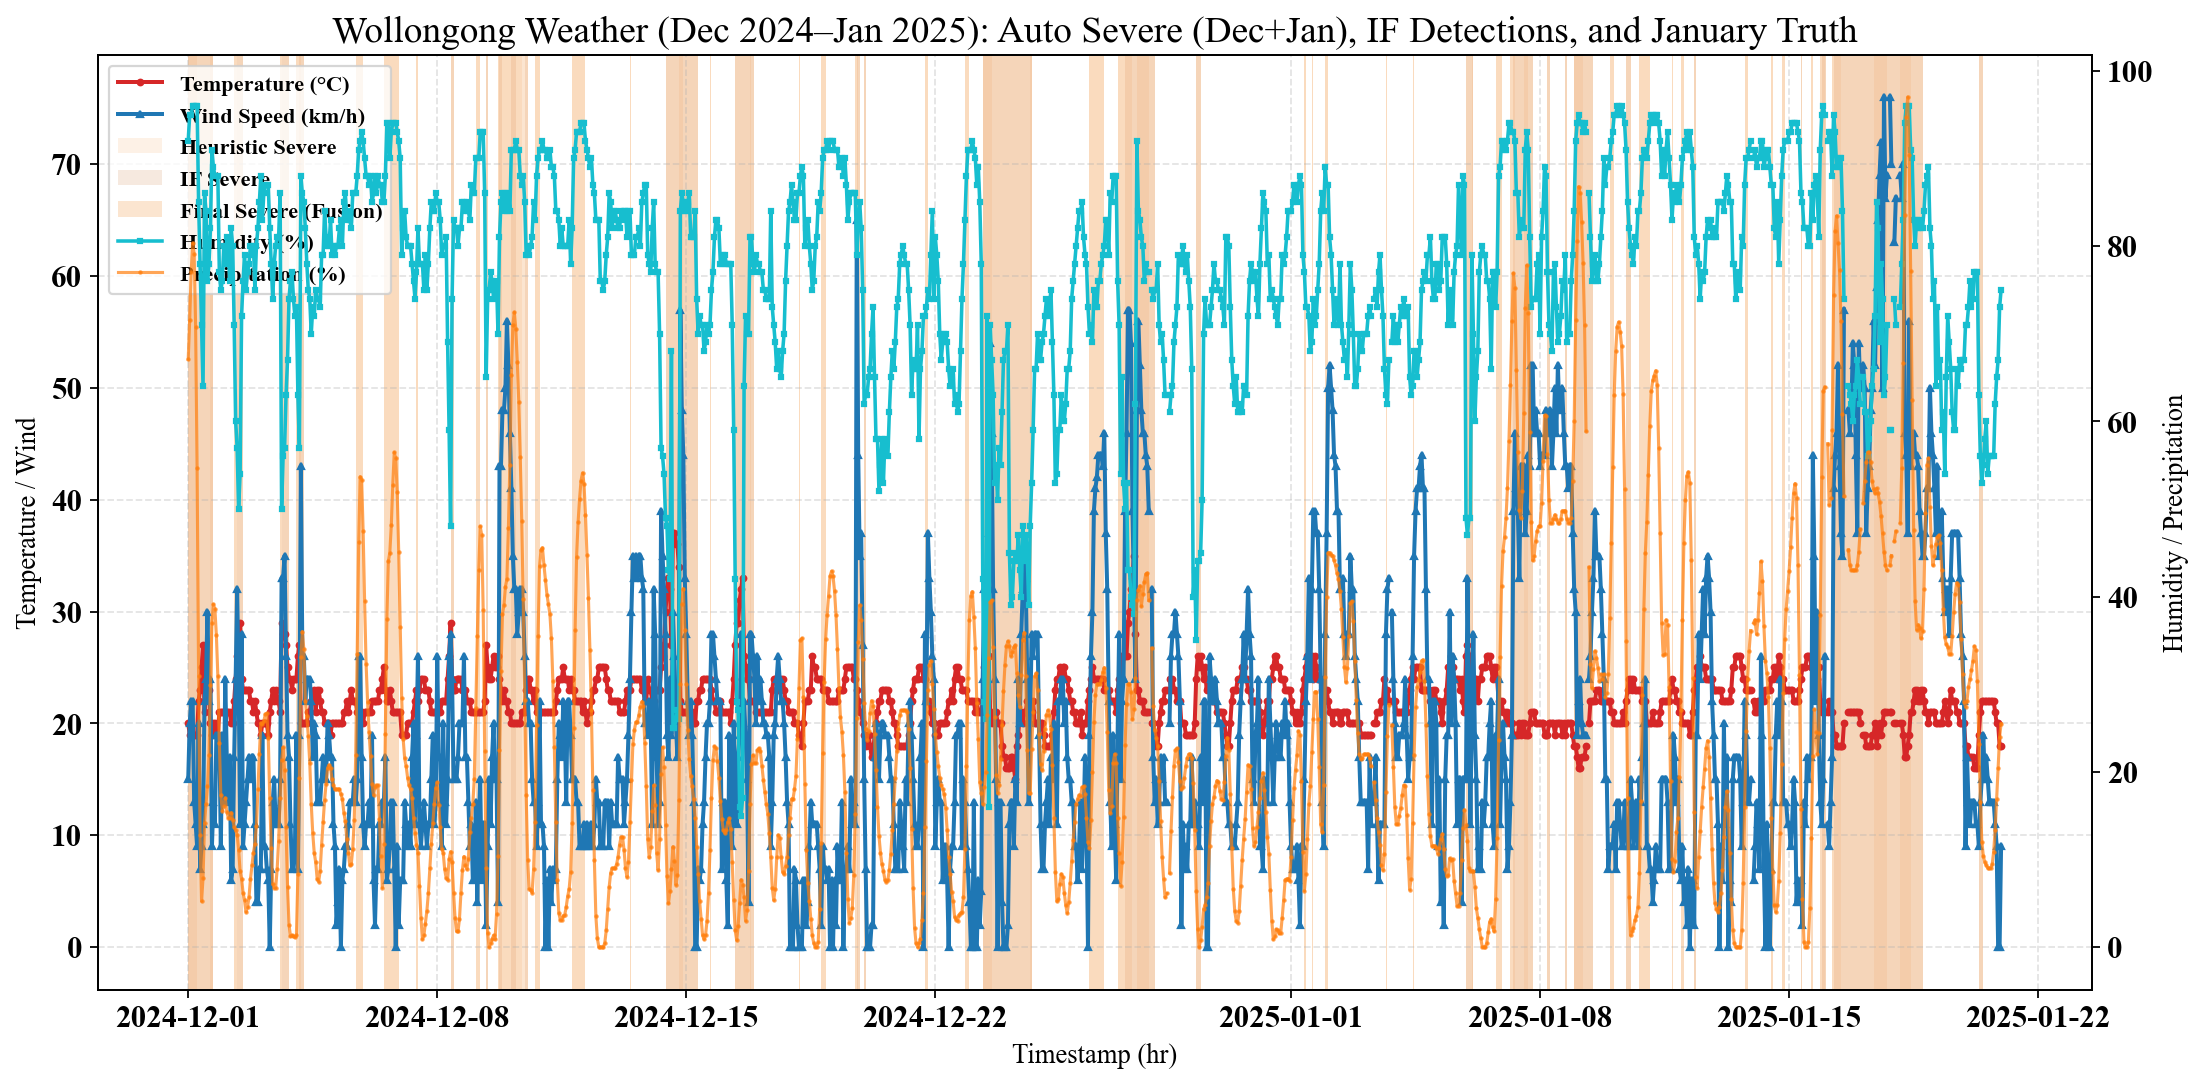

In [6]:
# ============================================================
# Automatic severe detection for Dec 2024 + Jan 2025 (improved)
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# ---------- INPUT ----------
# df must be your hourly DataFrame with index=Timestamp (naive or tz-aware)
# columns: ["Temperature_C","Wind_km_h","Humidity_%","Precipitation_%"]
df = df_x.copy().sort_index()
df = df[~df.index.duplicated(keep="first")]
if pd.infer_freq(df.index) != "H":
    df = df.resample("H").mean()

try:
    if df.index.tz is None:
        df.index = df.index.tz_localize("Australia/Sydney")
except Exception:
    pass

REQ = ["Temperature_C","Wind_km_h","Humidity_%","Precipitation_%"]
for c in REQ:
    if c not in df.columns:
        raise ValueError(f"Missing column: {c}")

SYD = "Australia/Sydney"
DEC_START = pd.Timestamp("2024-12-01 00:00", tz=SYD)
DEC_END   = pd.Timestamp("2024-12-31 23:59", tz=SYD)
JAN_START = pd.Timestamp("2025-01-01 00:00", tz=SYD)
JAN_END   = pd.Timestamp("2025-01-31 23:59", tz=SYD)

# ---------- helpers: spans + merging ----------
def spans_from_mask(mask: pd.Series, min_run: int) -> list[tuple[pd.Timestamp,pd.Timestamp,int]]:
    spans, run_start, run_len = [], None, 0
    for t, v in mask.items():
        if v:
            if run_start is None:
                run_start, run_len = t, 1
            else:
                run_len += 1
        else:
            if run_start is not None and run_len >= min_run:
                end = t - pd.Timedelta(hours=1)
                spans.append((run_start, end, run_len))
            run_start, run_len = None, 0
    if run_start is not None and run_len >= min_run:
        spans.append((run_start, mask.index[-1], run_len))
    return spans

def merge_spans(spans: list[tuple[pd.Timestamp,pd.Timestamp,int]], max_gap_hours: int = 2
               ) -> list[tuple[pd.Timestamp,pd.Timestamp,int]]:
    if not spans: return []
    spans = sorted(spans, key=lambda x: x[0])
    merged = [spans[0]]
    for s, e, d in spans[1:]:
        S, E, D = merged[-1]
        if (s - E) <= pd.Timedelta(hours=max_gap_hours):  # bridge small gaps
            new_e = max(E, e)
            new_len = int((new_e - S) / pd.Timedelta(hours=1)) + 1
            merged[-1] = (S, new_e, new_len)
        else:
            merged.append((s, e, d))
    return merged

def monthwise_heuristic_spans(df_m: pd.DataFrame) -> list[tuple[pd.Timestamp,pd.Timestamp,int]]:
    """Stronger heuristics: extremes + joint high + fast changes + humid↑+temp↓ coupling."""
    if len(df_m) < 8: 
        return []

    P = df_m["Precipitation_%"]
    W = df_m["Wind_km_h"]
    H = df_m["Humidity_%"]
    T = df_m["Temperature_C"]

    # Robust percentiles per month slice
    P90, P95    = np.nanpercentile(P, 90), np.nanpercentile(P, 95)
    W90, W95    = np.nanpercentile(W, 90), np.nanpercentile(W, 95)
    H85         = np.nanpercentile(H, 85)
    dP90        = np.nanpercentile(P.diff(1).fillna(0), 90)
    dW90        = np.nanpercentile(W.diff(1).fillna(0), 90)
    dT10        = np.nanpercentile(T.diff(3).fillna(0), 10)  # large drop => very negative

    # Conditions (per hour)
    c1 = P >= P95                                   # extreme rain
    c2 = W >= W95                                   # extreme wind
    c3 = (P >= P90) & (W >= W90)                    # jointly high rain+wind
    c4 = (P.diff(1) >= dP90).fillna(False)          # sudden intensification of rain
    c5 = (W.diff(1) >= dW90).fillna(False)          # sudden wind surge
    c6 = ((T.diff(3) <= dT10).fillna(False) & (H >= H85))  # sharp temp drop + high humidity

    # Persistence requirements (morphological opening)
    sp = []
    sp += spans_from_mask(c1, min_run=3)            # ≥3 h
    sp += spans_from_mask(c2, min_run=3)            # ≥3 h
    sp += spans_from_mask(c3, min_run=2)            # ≥2 h
    sp += spans_from_mask(c4 | c5, min_run=2)       # ≥2 h any fast change
    sp += spans_from_mask(c6, min_run=2)            # ≥2 h coupled condition

    return merge_spans(sp, max_gap_hours=2)

# ---------- (A) Automatic severe detection for Dec AND Jan (heuristics) ----------
dec_slice = df.loc[(df.index >= DEC_START) & (df.index <= DEC_END), REQ]
jan_slice = df.loc[(df.index >= JAN_START) & (df.index <= JAN_END), REQ]

dec_spans = monthwise_heuristic_spans(dec_slice)
jan_spans_auto = monthwise_heuristic_spans(jan_slice)

# ---------- (B) Your JAN-2025 ground-truth severe windows (given) ----------
JAN_WIN1 = (pd.Timestamp("2025-01-07 14:20", tz=SYD),
            pd.Timestamp("2025-01-10 22:00", tz=SYD))
JAN_WIN2 = (pd.Timestamp("2025-01-16 00:00", tz=SYD),
            pd.Timestamp("2025-01-18 23:59", tz=SYD))
JAN_TRUE_WINDOWS = [JAN_WIN1, JAN_WIN2]

# ---------- (C) Build ground-truth labels ----------
# For fair calibration: use January TRUE windows only as y_true for metrics/thresholding.
y_true_jan = pd.Series(0, index=df.index, dtype=int)
for s, e in JAN_TRUE_WINDOWS:
    y_true_jan.loc[(y_true_jan.index >= s) & (y_true_jan.index <= e)] = 1

# Also create a Dec+Jan label where Dec uses auto spans (optional, for reference plots/metrics)
y_true_decjan = y_true_jan.copy()
for s, e, _ in dec_spans:
    y_true_decjan.loc[(y_true_decjan.index >= s) & (y_true_decjan.index <= e)] = 1
for s, e, _ in jan_spans_auto:
    # keep January truth dominant; this only fills outside the provided true windows if any
    mask = (y_true_decjan.index >= s) & (y_true_decjan.index <= e)
    y_true_decjan.loc[mask & (y_true_jan == 0)] = 1

# ---------- (D) Feature engineering for Isolation Forest ----------
Z = df[REQ].copy()
for col in REQ:
    Z[f"{col}_diff1"] = Z[col].diff(1)
    Z[f"{col}_diff3"] = Z[col].diff(3)
for w in (3, 6, 12, 24):
    for col in REQ:
        Z[f"{col}_roll{w}_mean"] = Z[col].rolling(w, min_periods=max(2, w//2)).mean()
        Z[f"{col}_roll{w}_std"]  = Z[col].rolling(w, min_periods=max(2, w//2)).std()

# seasonal/time encodings
hod = Z.index.hour.values
dow = Z.index.dayofweek.values
woy = Z.index.isocalendar().week.astype(int).values
Z["hour_sin"] = np.sin(2*np.pi*hod/24.0); Z["hour_cos"] = np.cos(2*np.pi*hod/24.0)
Z["dow_sin"]  = np.sin(2*np.pi*dow/7.0);  Z["dow_cos"]  = np.cos(2*np.pi*dow/7.0)
Z["woy_sin"]  = np.sin(2*np.pi*woy/52.0); Z["woy_cos"]  = np.cos(2*np.pi*woy/52.0)
Z = Z.replace([np.inf, -np.inf], np.nan).fillna(method="ffill").fillna(method="bfill").fillna(0.0)

scaler = RobustScaler()
X = scaler.fit_transform(Z.values)

# ---------- (E) Isolation Forest (train on all), threshold calibrated on Jan truth ----------
iso = IsolationForest(n_estimators=500, contamination=0.12, random_state=42, n_jobs=-1)
iso.fit(X)
scores = pd.Series(iso.score_samples(X), index=df.index, name="iso_score")  # lower => more anomalous

def choose_threshold(scores_s, y_true_s, max_contam=0.25, grid=360):
    qs = np.linspace(0.01, 0.40, grid)
    best = {"th": None, "f1": -1, "p": 0, "r": 0, "contam": None}
    for q in qs:
        th = scores_s.quantile(q)
        y_pred = (scores_s <= th).astype(int)
        contam = y_pred.mean()
        if contam > max_contam:
            continue
        p, r, f1, _ = precision_recall_fscore_support(y_true_s, y_pred, average="binary", zero_division=0)
        if f1 > best["f1"]:
            best = {"th": th, "f1": f1, "p": p, "r": r, "contam": contam}
    if best["th"] is None:
        best["th"] = scores_s.quantile(0.15)
        y_pred = (scores_s <= best["th"]).astype(int)
        best["contam"] = y_pred.mean()
        p, r, f1, _ = precision_recall_fscore_support(y_true_s, y_pred, average="binary", zero_division=0)
        best.update({"p": p, "r": r, "f1": f1})
    return best

# Calibrate using January only
scores_jan = scores.loc[(scores.index >= JAN_START) & (scores.index <= JAN_END)]
ytrue_jan_sub = y_true_jan.loc[scores_jan.index]
cal = choose_threshold(scores_jan, ytrue_jan_sub, max_contam=0.25, grid=360)

# IF predictions on full period
y_pred_if = (scores <= cal["th"]).astype(int)

# Convert IF mask to spans with small persistence, then merge
if_spans = spans_from_mask(y_pred_if.astype(bool), min_run=2)
if_spans = merge_spans(if_spans, max_gap_hours=2)

# ---------- (F) Final fusion: Heuristic ∪ IF ----------
auto_spans_all = dec_spans + jan_spans_auto
final_spans = merge_spans(auto_spans_all + if_spans, max_gap_hours=2)

# Build final predicted mask from spans
y_pred_final = pd.Series(0, index=df.index, dtype=int)
for s, e, _ in final_spans:
    y_pred_final.loc[(y_pred_final.index >= s) & (y_pred_final.index <= e)] = 1

# ---------- (G) Metrics ----------
# Evaluate on January ground truth (primary)
yp_jan = y_pred_final.loc[(y_pred_final.index >= JAN_START) & (y_pred_final.index <= JAN_END)]
yt_jan = y_true_jan.loc[yp_jan.index]
acc_j = accuracy_score(yt_jan, yp_jan)
p_j, r_j, f1_j, _ = precision_recall_fscore_support(yt_jan, yp_jan, average="binary", zero_division=0)
cm_j = confusion_matrix(yt_jan, yp_jan, labels=[0,1])

# Optional: report against Dec+Jan reference (Dec is auto, Jan is true)
yp_dj = y_pred_final.reindex(y_true_decjan.index)
acc_dj = accuracy_score(y_true_decjan, yp_dj)
p_dj, r_dj, f1_dj, _ = precision_recall_fscore_support(y_true_decjan, yp_dj, average="binary", zero_division=0)
cm_dj = confusion_matrix(y_true_decjan, yp_dj, labels=[0,1])

print("=== January 2025 Evaluation (TRUE labels) ===")
print(f"[IF threshold q*]      : score <= {cal['th']:.4f}")
print(f"[IF contamination est] : {cal['contam']:.3f}")
print(f"Accuracy               : {acc_j:.3f}")
print(f"Precision              : {p_j:.3f}")
print(f"Recall                 : {r_j:.3f}")
print(f"F1-score               : {f1_j:.3f}")
print("Confusion matrix (Jan) [[TN, FP],[FN, TP]]:")
print(cm_j)

print("\n=== Dec 2024 + Jan 2025 (Dec auto, Jan TRUE) ===")
print(f"Accuracy               : {acc_dj:.3f}")
print(f"Precision              : {p_dj:.3f}")
print(f"Recall                 : {r_dj:.3f}")
print(f"F1-score               : {f1_dj:.3f}")
print("Confusion matrix (Dec+Jan) [[TN, FP],[FN, TP]]:")
print(cm_dj)

# ---------- (H) Plot ----------
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=160)
ax2 = ax1.twinx()

ax1.plot(df.index, df["Temperature_C"], marker="o", markersize=2.5, linewidth=1.8,
         label="Temperature (°C)", color="#d62728")
ax1.plot(df.index, df["Wind_km_h"], marker="^", markersize=2.5, linewidth=1.8,
         label="Wind Speed (km/h)", color="#1f77b4")

ax2.plot(df.index, df["Humidity_%"], marker="s", markersize=2.0, linewidth=1.6,
         label="Humidity (%)", color="#17becf")
ax2.plot(df.index, df["Precipitation_%"], marker=".", markersize=2.0, linewidth=1.4,
         label="Precipitation (%)", color="#ff7f0e", alpha=0.7)

# Shade heuristic spans (Dec + Jan auto)
for i, (s, e, d) in enumerate(auto_spans_all, 1):
    ax1.axvspan(s, e, color="#f4a259", alpha=0.15, lw=0,
                label="Heuristic Severe" if i == 1 else None)

# Shade IF spans (thin, slightly darker)
for i, (s, e, d) in enumerate(if_spans, 1):
    ax1.axvspan(s, e, color="#c76d2b", alpha=0.15, lw=0,
                label="IF Severe" if i == 1 else None)

# Shade FINAL fused spans
for i, (s, e, d) in enumerate(final_spans, 1):
    ax1.axvspan(s, e, color="#f4a259", alpha=0.28, lw=0,
                label="Final Severe (Fusion)" if i == 1 else None)

# Outline January TRUE windows for visual reference
# ax1.axvspan(JAN_WIN1[0], JAN_WIN1[1], color="#2ca02c", alpha=0.12, lw=0, label="Jan TRUE Window")
# ax1.axvspan(JAN_WIN2[0], JAN_WIN2[1], color="#2ca02c", alpha=0.12, lw=0)

ax1.grid(True, which="both", linestyle="--", alpha=0.35)
ax1.set_xlabel("Timestamp (hr)", fontsize=12)
ax1.set_ylabel("Temperature / Wind", fontsize=12)
ax2.set_ylabel("Humidity / Precipitation", fontsize=12)

# Unified legend (deduplicate)
l1, lab1 = ax1.get_legend_handles_labels()
l2, lab2 = ax2.get_legend_handles_labels()
handles, labels, seen = [], [], set()
for h, l in list(zip(l1+l2, lab1+lab2)):
    if l not in seen and l is not None:
        handles.append(h); labels.append(l); seen.add(l)
ax1.legend(handles, labels, loc="upper left", frameon=True, fontsize=10)

plt.title("Wollongong Weather (Dec 2024–Jan 2025): Auto Severe (Dec+Jan), IF Detections, and January Truth")
plt.tight_layout()
plt.show()


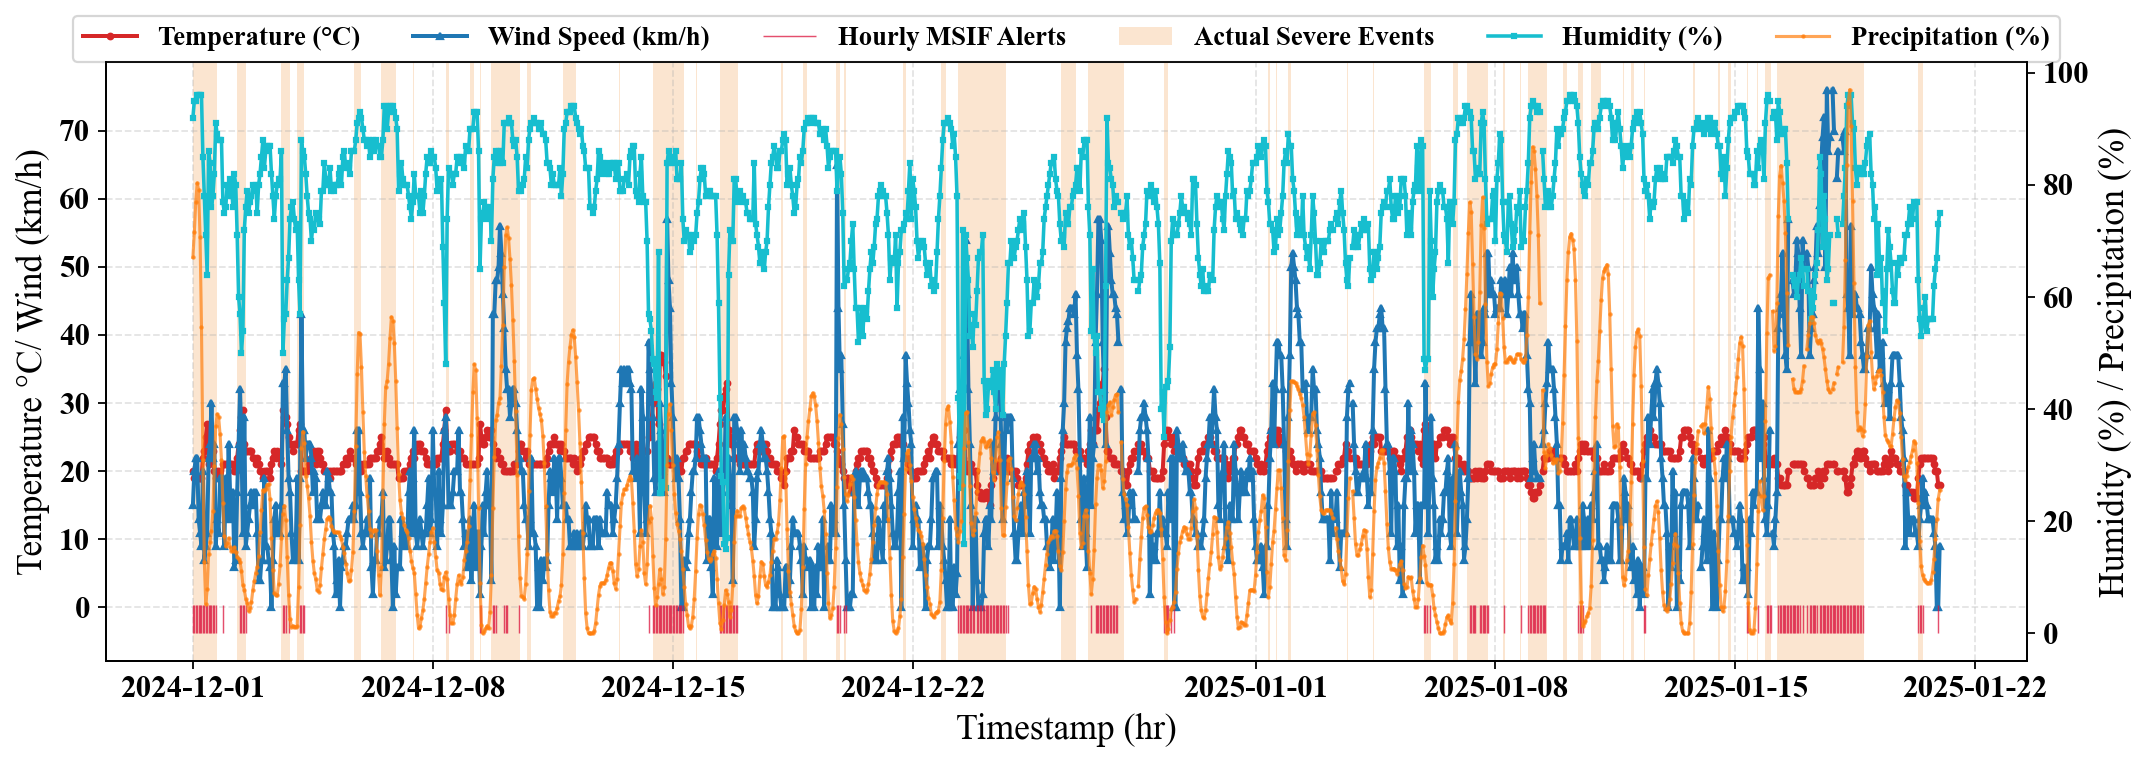

In [13]:
# ---------- (H) Plot ----------
fig, ax1 = plt.subplots(figsize=(14, 5), dpi=160)
ax2 = ax1.twinx()

ax1.plot(df.index, df["Temperature_C"], marker="o", markersize=2.5, linewidth=1.8,
         label="Temperature (°C)", color="#d62728")
ax1.plot(df.index, df["Wind_km_h"], marker="^", markersize=2.5, linewidth=1.8,
         label="Wind Speed (km/h)", color="#1f77b4")

ax2.plot(df.index, df["Humidity_%"], marker="s", markersize=2.0, linewidth=1.6,
         label="Humidity (%)", color="#17becf")
ax2.plot(df.index, df["Precipitation_%"], marker=".", markersize=2.0, linewidth=1.4,
         label="Precipitation (%)", color="#ff7f0e", alpha=0.7)

# # Shade heuristic spans (Dec + Jan auto)
# for i, (s, e, d) in enumerate(auto_spans_all, 1):
#     ax1.axvspan(s, e, color="#f4a259", alpha=0.15, lw=0,
#                 label="Heuristic Severe" if i == 1 else None)

# # Shade IF spans (thin, slightly darker)
# for i, (s, e, d) in enumerate(if_spans, 1):
#     ax1.axvspan(s, e, color="#c72b2b", alpha=0.15, lw=0,
#                 label="IF Severe" if i == 1 else None)
# Mark IF detections (subtle ticks)
anom_times = df.index[y_pred.values == 1]
ymin, ymax = ax1.get_ylim()
ax1.vlines(anom_times, ymin=ymin, ymax=ymin + 0.05*(ymax-ymin),
           color="crimson", alpha=0.75, linewidth=0.65, label="Hourly MSIF Alerts")

# Shade FINAL fused spans
for i, (s, e, d) in enumerate(final_spans, 1):
    ax1.axvspan(s, e, color="#f4a259", alpha=0.28, lw=0,
                label="Actual Severe Events" if i == 1 else None)

# Outline January TRUE windows for visual reference
# ax1.axvspan(JAN_WIN1[0], JAN_WIN1[1], color="#2ca02c", alpha=0.12, lw=0, label="Jan TRUE Window")
# ax1.axvspan(JAN_WIN2[0], JAN_WIN2[1], color="#2ca02c", alpha=0.12, lw=0)

ax1.grid(True, which="both", linestyle="--", alpha=0.35)
ax1.set_xlabel("Timestamp (hr)", fontsize=16)
ax1.set_ylabel("Temperature °C/ Wind (km/h)", fontsize=16)
ax2.set_ylabel("Humidity (%) / Precipitation (%)", fontsize=16)

# Unified legend (deduplicate)
l1, lab1 = ax1.get_legend_handles_labels()
l2, lab2 = ax2.get_legend_handles_labels()
handles, labels, seen = [], [], set()
for h, l in list(zip(l1+l2, lab1+lab2)):
    if l not in seen and l is not None:
        handles.append(h); labels.append(l); seen.add(l)
# ax1.legend(handles, labels, loc="upper left", frameon=True, fontsize=10)
ax1.legend(handles, labels, loc="upper center", frameon=True, fontsize=12, bbox_to_anchor=(0.5, 1.1), ncol=6)

# plt.title("Wollongong Weather (Dec 2024–Jan 2025): Auto Severe (Dec+Jan), IF Detections, and January Truth")
plt.tight_layout()

import os

os.makedirs("Figures", exist_ok=True)
plt.savefig("Figures/Anomaly_Detection.png", dpi=600, bbox_inches='tight')


plt.show()
